# Treating the data
---
## NBA Metrics

## Dataset
Tha datasets used here were adapted from [https://kaggle.com/drgilermo/nba-players-stats](https://kaggle.com/drgilermo/nba-players-stats)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
df_players = pd.read_excel('../../datasets/exercise-3/players-nba.xlsx', index_col='Player').drop(columns='Unnamed: 0')
df_players.head()

,height,weight,collage,born,birth_city,birth_state
Player,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
df_metrics = pd.read_excel('../../datasets/exercise-3/metrics-nba.xlsx').drop(columns='Unnamed: 0')
df_metrics.head()

In [ ]:
df_nba = df_metrics.join(df_players, how='left', on='Player', lsuffix='player', rsuffix='player')
df_nba.head()


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144,516,0.279,NaN,NaN,NaN,144,516,0.279,0.279,170,241,0.705,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102,274,0.372,NaN,NaN,NaN,102,274,0.372,0.372,75,106,0.708,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174,499,0.349,NaN,NaN,NaN,174,499,0.349,0.349,90,129,0.698,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22,86,0.256,NaN,NaN,NaN,22,86,0.256,0.256,19,34,0.559,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21,82,0.256,NaN,NaN,NaN,21,82,0.256,0.256,17,31,0.548,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


## Treating some outliers
## Using **IQR**
Great Explanation: https://www.linkedin.com/pulse/treating-removing-outliers-dataset-using-python-anubhav-tyagi/

In [ ]:
hs = df_nba['height'].sort_values()
q1 = hs.quantile(0.25)
q3 = hs.quantile(0.75)
iqr = q3-q1

print('IQR: ', iqr)

IQR:  13.0


```
IQR = 3th Quantile - 1st Quantile
isOutlier = dataset >= (1st Quantile - 1.5 * IQR) & dataset <= (3th Quantile + 1.5 * IQR)
```

{'whiskers': [<matplotlib.lines.Line2D at 0x7fed596756d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed59675d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed59675280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed59663490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed59663820>],
 'means': []}

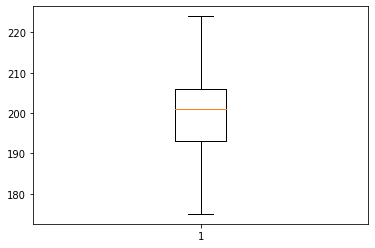

In [ ]:
hs2 = hs[(hs >= (q1 - 1.5 * iqr)) & (hs <= (q3 + 1.5 * iqr))]
plt.boxplot(hs2)

In [ ]:
hs2.describe()

count    24393.000000
mean       199.428402
std          9.074550
min        175.000000
25%        193.000000
50%        201.000000
75%        206.000000
max        224.000000
Name: height, dtype: float64

In [ ]:
hs.shape, hs2.shape

((24624,), (24393,))

In [ ]:
def get_non_extreme_mean(s: pd.Series) -> float:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return s[(s >= (q1 - 1.5 * iqr)) & (s <= (q3 + 1.5 * iqr))].mean()

In [ ]:
def replace_extrems_and_nan_by_mean(s: pd.Series) -> pd.Series:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    not_outlier = (s >= (q1 - 1.5 * iqr)) & (s <= (q3 + 1.5 * iqr))
    
    s_mean = s[not_outlier].mean()
    return s.fillna(s_mean).where(not_outlier, s_mean).sort_values()

In [ ]:
df_nba['height'] = replace_extrems_and_nan_by_mean(df_nba['height'])
df_nba['weight'] = replace_extrems_and_nan_by_mean(df_nba['weight'])
df_nba['TS%'] = replace_extrems_and_nan_by_mean(df_nba['TS%'])

In [ ]:
df_nba['birth_city'].fillna('Undefined', inplace=True)
df_nba['birth_state'].fillna('Undefined', inplace=True)
df_nba['collage'].fillna('Undefined', inplace=True)


In [ ]:
df_nba.sample(frac=0.0003, random_state=10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
21349,2012,Carldell Johnson,PG,29.0,NOH,15,0.0,119.0,8.9,0.372,0.429,0.086,1.0,7.9,4.5,29.4,3.7,0.0,16.2,17.2,NaN,-0.1,0.1,0.0,-0.003,NaN,-3.2,-1.3,-4.5,-0.1,11,35,0.314,4.0,15.0,0.267,7,20,0.350,0.371,1,3,0.333,1.0,8.0,9.0,22,8.0,0.0,7.0,11,27,178.0,81.0,University of Alabama at Birmingham,1983.0,New Orleans,Louisiana
22429,2014,Willie Green,SG,32.0,LAC,55,9.0,869.0,7.1,0.477,0.446,0.125,1.6,8.2,5.0,8.3,1.3,1.0,10.6,16.3,NaN,-0.2,0.7,0.5,0.028,NaN,-2.6,-0.8,-3.4,-0.3,102,271,0.376,41.0,121.0,0.339,61,150,0.407,0.452,28,34,0.824,12.0,66.0,78.0,50,22.0,11.0,34.0,96,273,193.0,90.0,University of Detroit Mercy,1981.0,Detroit,Michigan
10241,1991,Tod Murphy,PF,27.0,MIN,52,19.0,1063.0,10.6,0.459,0.075,0.463,9.4,19.0,13.9,7.7,1.2,1.2,10.5,12.4,NaN,0.6,0.7,1.4,0.062,NaN,-2.6,0.0,-2.6,-0.2,90,227,0.396,1.0,17.0,0.059,89,210,0.424,0.399,70,105,0.667,92.0,163.0,255.0,60,25.0,20.0,32.0,101,251,206.0,99.0,"University of California, Irvine",1963.0,Long Beach,California
1718,1962,Swede Halbrook,C,29.0,SYR,64,NaN,908.0,11.6,0.409,NaN,0.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,1.5,0.6,0.033,NaN,NaN,NaN,NaN,NaN,152,422,0.360,NaN,NaN,NaN,152,422,0.360,0.360,96,151,0.636,NaN,NaN,399.0,33,NaN,NaN,NaN,179,400,221.0,106.0,Oregon State University,1933.0,Undefined,Undefined
17725,2006,Antonio Davis,PF,37.0,NYK,36,31.0,749.0,8.9,0.487,0.006,0.384,12.0,15.9,14.0,3.0,1.4,1.0,18.8,13.8,NaN,0.0,0.3,0.4,0.024,NaN,-2.6,-0.7,-3.3,-0.2,68,159,0.428,0.0,1.0,0.000,68,158,0.430,0.428,45,61,0.738,75.0,97.0,172.0,14,20.0,9.0,43.0,99,181,206.0,97.0,University of Texas at El Paso,1968.0,Oakland,California
18726,2008,Brandon Bass,C,22.0,DAL,79,1.0,1557.0,15.9,0.564,0.008,0.400,9.2,16.3,12.9,6.1,0.8,2.3,12.4,19.8,NaN,2.4,1.9,4.3,0.132,NaN,-1.0,0.0,-1.0,0.4,246,493,0.499,0.0,4.0,0.000,246,489,0.503,0.499,162,197,0.822,120.0,227.0,347.0,58,22.0,48.0,82.0,150,654,203.0,113.0,Louisiana State University,1985.0,Baton Rouge,Louisiana
14205,1999,Tracy McGrady,SF,19.0,TOR,49,2.0,1106.0,20.6,0.504,0.091,0.408,12.4,16.7,14.6,19.1,2.5,4.5,15.0,21.9,NaN,1.8,1.4,3.3,0.143,NaN,1.8,2.2,4.0,1.7,168,385,0.436,8.0,35.0,0.229,160,350,0.457,0.447,114,157,0.726,120.0,158.0,278.0,113,52.0,66.0,80.0,94,458,203.0,95.0,Undefined,1979.0,Bartow,Florida


In [ ]:
df_ages = pd.DataFrame(df_nba['Age'])
df_ages['Qt'] = 1

df_ages_grouped = df_ages.sort_values(by='Age').groupby('Age')['Qt'].count()
df_ages_grouped = pd.DataFrame(df_ages_grouped).reset_index()

df_ages.drop(columns='Qt', inplace=True)
df_ages_grouped

,Age,Qt
0,18.0,13
1,19.0,111
2,20.0,288
3,21.0,609
4,22.0,1926
5,23.0,2748
6,24.0,2794
7,25.0,2518
8,26.0,2380
9,27.0,2149


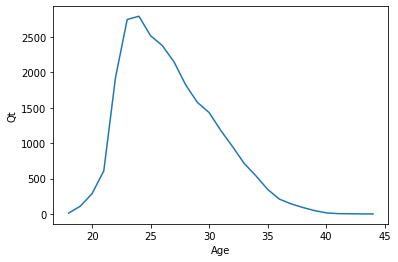

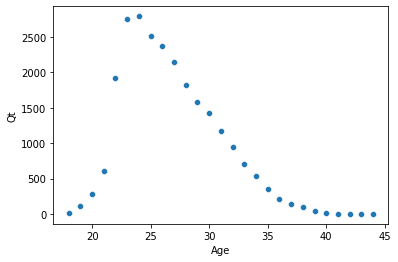

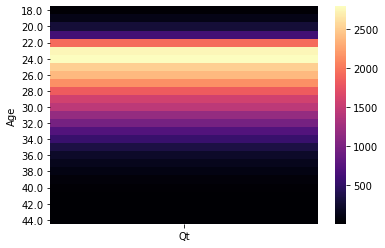

In [ ]:
sns.lineplot(data=df_ages_grouped, x='Age', y='Qt')
plt.show()

sns.scatterplot(data=df_ages_grouped, x='Age', y='Qt')
plt.show()

sns.heatmap(df_ages_grouped.set_index('Age'), cmap='magma')
plt.show()

## Discretizing Age
### Understanding a little more about the data

<AxesSubplot:>

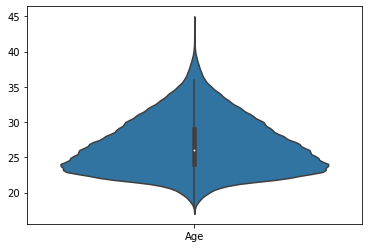

In [ ]:
sns.violinplot(data=df_ages)

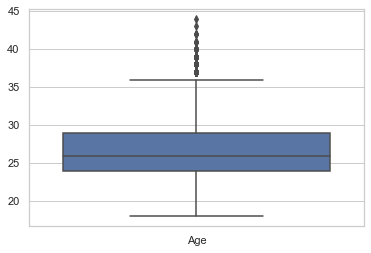

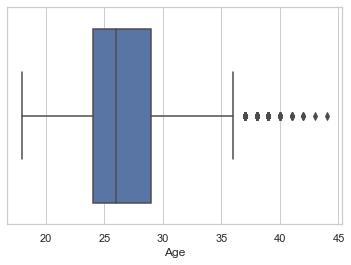

In [ ]:
sns.boxplot(data=df_ages)
plt.show()

# or

sns.boxplot(data=df_ages, x='Age')
plt.show()

In [ ]:
print('Junior <= ', df_ages['Age'].quantile(0.333))
print('Pleno <= ', df_ages['Age'].quantile(0.666))


Junior <=  24.0
Pleno <=  28.0


In [ ]:
def discretize_column(s: pd.Series) -> pd.Series:
    def discretize_value(val) -> str:
        if (val <= s.quantile(0.333)):
            return 'Junior Player'
        if (val <= s.quantile(0.666)):
            return 'Just Player'
        return 'Senior Player'

    return s.apply(discretize_value)

In [ ]:
df_nba['Lvl'] = discretize_column(df_nba['Age'])
df_nba.sample(frac=0.0003, random_state=10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state,Lvl
21349,2012,Carldell Johnson,PG,29.0,NOH,15,0.0,119.0,8.9,0.372,0.429,0.086,1.0,7.9,4.5,29.4,3.7,0.0,16.2,17.2,NaN,-0.1,0.1,0.0,-0.003,NaN,-3.2,-1.3,-4.5,-0.1,11,35,0.314,4.0,15.0,0.267,7,20,0.350,0.371,1,3,0.333,1.0,8.0,9.0,22,8.0,0.0,7.0,11,27,178.0,81.0,University of Alabama at Birmingham,1983.0,New Orleans,Louisiana,Senior Player
22429,2014,Willie Green,SG,32.0,LAC,55,9.0,869.0,7.1,0.477,0.446,0.125,1.6,8.2,5.0,8.3,1.3,1.0,10.6,16.3,NaN,-0.2,0.7,0.5,0.028,NaN,-2.6,-0.8,-3.4,-0.3,102,271,0.376,41.0,121.0,0.339,61,150,0.407,0.452,28,34,0.824,12.0,66.0,78.0,50,22.0,11.0,34.0,96,273,193.0,90.0,University of Detroit Mercy,1981.0,Detroit,Michigan,Senior Player
10241,1991,Tod Murphy,PF,27.0,MIN,52,19.0,1063.0,10.6,0.459,0.075,0.463,9.4,19.0,13.9,7.7,1.2,1.2,10.5,12.4,NaN,0.6,0.7,1.4,0.062,NaN,-2.6,0.0,-2.6,-0.2,90,227,0.396,1.0,17.0,0.059,89,210,0.424,0.399,70,105,0.667,92.0,163.0,255.0,60,25.0,20.0,32.0,101,251,206.0,99.0,"University of California, Irvine",1963.0,Long Beach,California,Just Player
1718,1962,Swede Halbrook,C,29.0,SYR,64,NaN,908.0,11.6,0.409,NaN,0.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,1.5,0.6,0.033,NaN,NaN,NaN,NaN,NaN,152,422,0.360,NaN,NaN,NaN,152,422,0.360,0.360,96,151,0.636,NaN,NaN,399.0,33,NaN,NaN,NaN,179,400,221.0,106.0,Oregon State University,1933.0,Undefined,Undefined,Senior Player
17725,2006,Antonio Davis,PF,37.0,NYK,36,31.0,749.0,8.9,0.487,0.006,0.384,12.0,15.9,14.0,3.0,1.4,1.0,18.8,13.8,NaN,0.0,0.3,0.4,0.024,NaN,-2.6,-0.7,-3.3,-0.2,68,159,0.428,0.0,1.0,0.000,68,158,0.430,0.428,45,61,0.738,75.0,97.0,172.0,14,20.0,9.0,43.0,99,181,206.0,97.0,University of Texas at El Paso,1968.0,Oakland,California,Senior Player
18726,2008,Brandon Bass,C,22.0,DAL,79,1.0,1557.0,15.9,0.564,0.008,0.400,9.2,16.3,12.9,6.1,0.8,2.3,12.4,19.8,NaN,2.4,1.9,4.3,0.132,NaN,-1.0,0.0,-1.0,0.4,246,493,0.499,0.0,4.0,0.000,246,489,0.503,0.499,162,197,0.822,120.0,227.0,347.0,58,22.0,48.0,82.0,150,654,203.0,113.0,Louisiana State University,1985.0,Baton Rouge,Louisiana,Junior Player
14205,1999,Tracy McGrady,SF,19.0,TOR,49,2.0,1106.0,20.6,0.504,0.091,0.408,12.4,16.7,14.6,19.1,2.5,4.5,15.0,21.9,NaN,1.8,1.4,3.3,0.143,NaN,1.8,2.2,4.0,1.7,168,385,0.436,8.0,35.0,0.229,160,350,0.457,0.447,114,157,0.726,120.0,158.0,278.0,113,52.0,66.0,80.0,94,458,203.0,95.0,Undefined,1979.0,Bartow,Florida,Junior Player


## Asking some questions

### 1. What is the age/height mean of the players?

In [ ]:
df_means = pd.DataFrame(df_nba).sort_values(by='Year')
df_means['Decade'] = np.int8((np.trunc(df_means['Year'] % 100 / 10) * 10))

df_means = df_means.groupby('Decade')[['Age', 'weight']].mean().round(0).astype(int)
df_means

,Age,weight
Decade,,
0,27,98
10,27,99
50,26,89
60,26,93
70,26,92
80,26,93
90,27,96


In [ ]:
df_mean_age = pd.DataFrame({'Value': df_means['Age']})
df_mean_age['Type'] = 'Age'
df_mean_weight = pd.DataFrame({'Value': df_means['weight']})
df_mean_weight['Type'] = 'Weight'

df_means_g = pd.concat([df_mean_age, df_mean_weight]).reset_index()
df_means_g

,Decade,Value,Type
0,0,27,Age
1,10,27,Age
2,50,26,Age
3,60,26,Age
4,70,26,Age
5,80,26,Age
6,90,27,Age
7,0,98,Weight
8,10,99,Weight
9,50,89,Weight


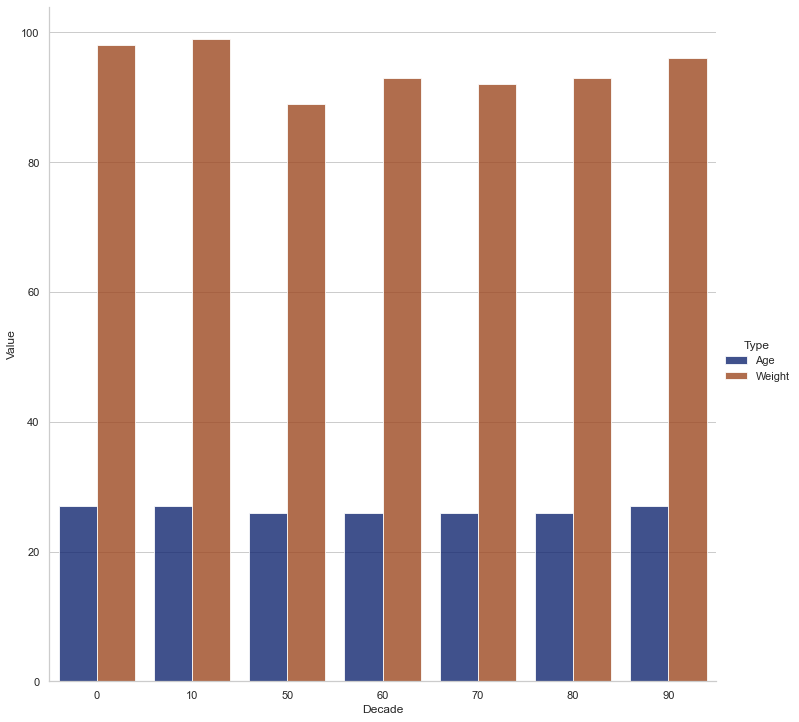

In [ ]:
sns.set_theme(style="whitegrid")
sns.catplot(data=df_means_g, kind='bar', x='Decade', y='Value', hue='Type', height=10, alpha=.8, palette='dark')

### 2. Which player has the biggest ammount of points?

In [ ]:
df_nba.groupby('Player')['PTS'].sum().sort_values(ascending=False)

Player
Kareem Abdul-Jabbar*    38387
Karl Malone*            36928
Wilt Chamberlain*       33953
Kobe Bryant             33643
Michael Jordan*         32292
                        ...  
Gani Lawal                  0
Maurice Baker               0
Al Jackson                  0
Andy Panko                  0
Ibo Kutluay                 0
Name: PTS, Length: 3921, dtype: int64

### 3. Which player spend the longest time on the same team? What is the team? For how long?

In [ ]:
df_nba.groupby(['Player', 'Tm'])['Year'].count().sort_values(ascending=False)

Player              Tm 
Kobe Bryant         LAL    20
Dirk Nowitzki       DAL    19
John Stockton*      UTA    19
Tim Duncan          SAS    19
Reggie Miller*      IND    18
                           ..
Bryant Stith        BOS     1
John Long           ATL     1
John Logan          TRI     1
                    STB     1
Zydrunas Ilgauskas  MIA     1
Name: Year, Length: 12150, dtype: int64